# <a id="2"></a>
<h1 style="background-color:lightcoral;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;">Welcome to our Graduation Project</h1>

# <a id="1.2"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Stroke Prediction Dataset Overview</h3>

**According to the World Health Organization (WHO) :**  
stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

|               Column               |                                            Description                                             |
|:----------------------------------:|:--------------------------------------------------------------------------------------------------:|
|               Gender               |                              Male or female (Nominal)                                              |
|                Age                 |                              Age of the patient (Continuous)                                       |
|           Hypertension             |        Whether or not the patient has hypertension (Nominal: "Yes", "No")                         |
|           Heart Disease            |        Whether or not the patient has heart disease (Nominal: "Yes", "No")                        |
|           Ever Married             |        Whether or not the patient has ever been married (Nominal: "Yes", "No")                    |
|             Work Type              |        Type of occupation (Nominal: "Private", "Self-employed", "Govt_job", "children", "Never_worked") |
|           Residence Type           |        Type of residence (Nominal: "Urban", "Rural")                                              |
|        Avg Glucose Level          |        Average glucose level in blood (Continuous)                                                 |
|                BMI                |                              Body Mass Index (Continuous)                                          |
|           Smoking Status           |        Smoking status (Nominal: "formerly smoked", "never smoked", "smokes", "unknown")           |
|              Stroke                |        Whether the patient had a stroke (Binary: "1" means "Yes", "0" means "No")                 |

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Libraries & loading the data</h3>

In [233]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [234]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Exploratory Data Analysis</h3>

In [235]:
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 5110 Rows and 12 Columns


In [236]:
print(f"Number of duplicates {df.duplicated().sum()}")

Number of duplicates 0


In [237]:
##Deleting ID column
df = df.drop('id', axis=1)

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [239]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [240]:
round(df.describe(include='all'))

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.0,5110.0,5110.0,5110,5110,5110,5110.0,4909.0,5110,5110.0
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.0,0.0,0.0,NaN,NaN,NaN,106.0,29.0,NaN,0.0
std,NaN,23.0,0.0,0.0,NaN,NaN,NaN,45.0,8.0,NaN,0.0
min,NaN,0.0,0.0,0.0,NaN,NaN,NaN,55.0,10.0,NaN,0.0
25%,NaN,25.0,0.0,0.0,NaN,NaN,NaN,77.0,24.0,NaN,0.0
50%,NaN,45.0,0.0,0.0,NaN,NaN,NaN,92.0,28.0,NaN,0.0
75%,NaN,61.0,0.0,0.0,NaN,NaN,NaN,114.0,33.0,NaN,0.0


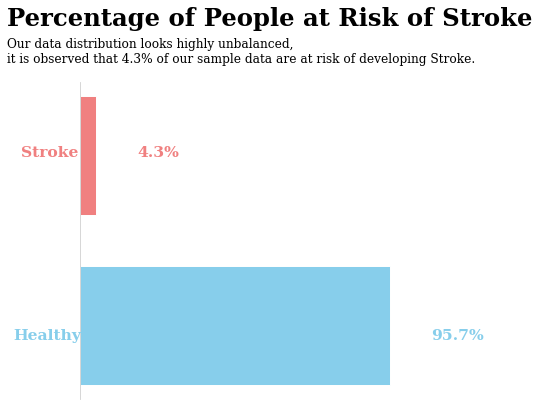

In [241]:
# let us overview the distribution of the target of our data
x = pd.DataFrame(df.groupby(['stroke'])['stroke'].count())

# Plot
fig, ax = plt.subplots(figsize=(6, 6), dpi=70)
ax.barh([1], x.stroke[1], height=0.7, color='lightcoral')
plt.text(-1050, -0.08, 'Healthy', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': 'skyblue'})
plt.text(5500, -0.08, '95.7%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'skyblue'})
ax.barh([0], x.stroke[0], height=0.7, color='skyblue')
plt.text(-930, 1, 'Stroke', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'style': 'normal', 'color': 'lightcoral'})
plt.text(900, 1, '4.3%', {'font': 'Serif', 'weight': 'bold', 'size': '16', 'color': 'lightcoral'})

fig.patch.set_facecolor('white')
ax.set_facecolor('white')

plt.text(-1150, 1.77, 'Percentage of People at Risk of Stroke', {'font': 'Serif', 'size': '25', 'weight': 'bold', 'color': 'black'})
plt.text(-1150, 1.55, 'Our data distribution looks highly unbalanced,\nit is observed that 4.3% of our sample data are at risk of developing Stroke.',
         {'font': 'Serif', 'size': '12.5', 'color': 'black'})

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

From distribution it is clear that **only every 4 people out of 100 people have develpoed Stroke from our sampling data**. So this this appears as a highly **unbalanced data distribution**, and null accuracy score of this distribution it self is 96%, whcih imploys any dump model should randomly predictions of stroke could reach accuracy of 96%. So, while modeling and training data, **over sampling and under sampling** have to be done to obtain good and reliable results.

# <a id="2.1"></a>
<h3 style="background-color:lightskyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Dealing With Null Values</h3>

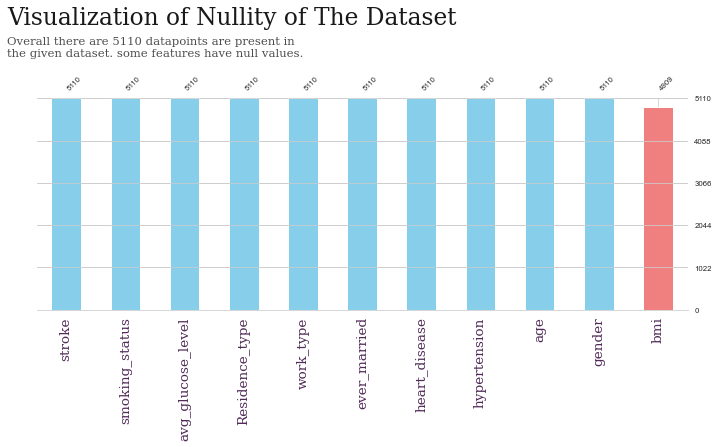

In [245]:
import missingno as msno

color = ['skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','skyblue','lightcoral']
fig, ax = plt.subplots(figsize = (12,4), dpi = 70)
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

msno.bar(df, sort = 'descending', 
         color = color, 
         ax = ax, fontsize =8,
         labels = 'off', filter = 'top')

ax.text(-1,1.35,'Visualization of Nullity of The Dataset',{'font': 'serif', 'size': 24,  'color':'black'},alpha = 0.9)
ax.text(-1,1.2,'Overall there are 5110 datapoints are present in \nthe given dataset. some features have null values.',{'font': 'serif', 'size': 12,  'color':'black'}, alpha = 0.7)

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, 
                   ha = 'center', **{'font': 'serif', 'size': 14,'weight':'normal','color':'#512b58'}, alpha = 1)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)

plt.show()

**How can we deal with blanks in our data?**

There are many ways. One can simply drop these records, fill the blanks with the mean, the median, or even simply the record before or after the missing value.

But there are other, more unusual ways. 

Here We will **fill null values in BMI column with the median**

In [246]:
df.loc[df.bmi.isnull(), 'bmi'] = df['bmi'].median()

In [247]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Visualization Functions</h3>

There are many different types of graphs, each with its own unique properties and applications. 

We will use :

   1- **Pie plot** : for **Categorical data**
   
   2- **KDE plot** (kernel density estimation plot) : for **Numerical data**
   
   3- **Box Plot** : for **definition of outliers in numerical data**

In [248]:
def kde_plot(col):
    plt.figure(figsize=(10,6))
    
    # Set the style of the plot
    sns.set_style("whitegrid")
    
    # Set the background color
    plt.rcParams['axes.facecolor'] = '#f0f0f0'
    
    # Generate the KDE plot
    sns.kdeplot(df[col], shade=True, color='lightcoral')
    
    plt.show()
    

In [249]:
def kde_with_target(col):
    plt.figure(figsize=(10,6))

    data1 = df[df['stroke'] == 1][col]
    data2 = df[df['stroke'] == 0][col]

    plot1 = sns.kdeplot(data1, shade=True, color='lightcoral')
    plot2 = sns.kdeplot(data2, shade=True, color='skyblue')

    plt.suptitle(f"The distribution of {col} for people with Stroke & without Stroke")

    plt.legend(title='Stroke', labels=['With Stroke', 'Without Stroke'])

    plt.show()
    

In [250]:
def pie_plot(df, group_feature, overall_title, colors):
    # Calculate percentage of each category in the group feature
    grouped = df[group_feature].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    with plt.style.context('fivethirtyeight'):
        fig, ax = plt.subplots(figsize=(8, 6))

        wedges, texts, autotexts = ax.pie(grouped['percentage'], labels=grouped['index'],
                                           autopct='%1.1f%%', colors=colors)
        ax.set_title(f'Distribution of {overall_title}')  # Set the title to be the group feature
        plt.setp(autotexts, size=16, color="w")

        plt.tight_layout()
        plt.show()
        

In [251]:
def pie_with_target(df, group_feature, overall_title):
    # Calculate percentage of people who developed Stroke for each group
    grouped = df.groupby(group_feature)['stroke'].value_counts(normalize=True).rename('percentage').mul(100).reset_index()

    # Define custom color palette
    custom_palette = {0: 'skyblue', 1: 'lightcoral'}
    # Define custom legend labels
    legend_labels = {0: 'Healthy', 1: 'Stroke'}

    unique_groups = grouped[group_feature].unique()
    num_unique_groups = len(unique_groups)

    # Ensure all Stroke statuses are in custom_palette and legend_labels
    assert set(grouped['stroke'].unique()).issubset(custom_palette.keys()), "All stroke statuses must be keys in custom_palette"
    assert set(grouped['stroke'].unique()).issubset(legend_labels.keys()), "All stroke statuses must be keys in legend_labels"

    with plt.style.context('fivethirtyeight'):
        fig, axs = plt.subplots(1, num_unique_groups, figsize=(15, 6))

        if num_unique_groups == 1:
            axs = [axs]  # To handle the case where there is only 1 group

        for i, group_status in enumerate(unique_groups):
            data = grouped[grouped[group_feature]== group_status ]
            labels = data['stroke'].map(legend_labels).tolist() # map stroke status to labels
            colors = data['stroke'].map(custom_palette).tolist() # map stroke status to colors
            wedges, texts, autotexts = axs[i].pie(data['percentage'], labels=labels, colors=colors, autopct='%1.1f%%')

            axs[i].set_title(f'{group_status}')  # Set the title to be the group feature and status
            plt.setp(autotexts, size=16, color="w")
        
        
        fig.suptitle(f'Percentage of people who developed Stroke grouped by {overall_title} status', fontsize=18)
        plt.tight_layout()
        plt.show()
        

In [252]:
def col_details(col_name):
    
    print(f"Name : {col_name} \nType : {df[col_name].dtype}")
    
    print(f"Number of unique Values : {df[col_name].nunique()}")
    
    print(f"Number of null Values : {df[col_name].isnull().sum()}")
    random_number = np.random.randint(4000)
    print(f"\nSome Random Data \n {df[col_name][random_number:random_number + 5]}")
    print(f"\nTop 5 Values {df[col_name].value_counts().index[:5]}")
    if df[col_name].dtype != "object":
        print(f"Max value : {df[col_name].max()}\nMin Value : {df[col_name].min()}")
    

In [253]:
def IQR_bands(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_band = Q1 - 1.5 * IQR
    upper_band = Q3 + 1.5 * IQR
    return upper_band, lower_band


In [254]:
def box_plot(df, feature, plot_title):
    with plt.style.context('fivethirtyeight'):
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[feature], color='skyblue')
        plt.title(f"Boxplot of {plot_title}")
        plt.xlabel(plot_title)
        plt.show()
        

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Parameters</h3>

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Gender :</h3>

**Male or Female**

In [255]:
col_details('gender')

Name : gender 
Type : object
Number of unique Values : 3
Number of null Values : 0

Some Random Data 
 3678    Female
3679      Male
3680      Male
3681    Female
3682    Female
Name: gender, dtype: object

Top 5 Values Index(['Female', 'Male', 'Other'], dtype='object')


In [256]:
##Deleting Other Record
df.drop(df[df["gender"]=="Other"].index,axis=0,inplace=True)

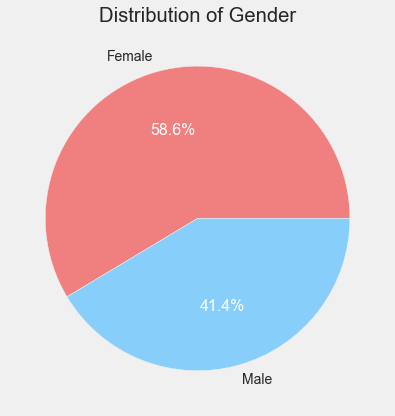

In [257]:
pie_plot(df, 'gender', 'Gender', colors=['lightcoral','lightskyblue','steelblue'])

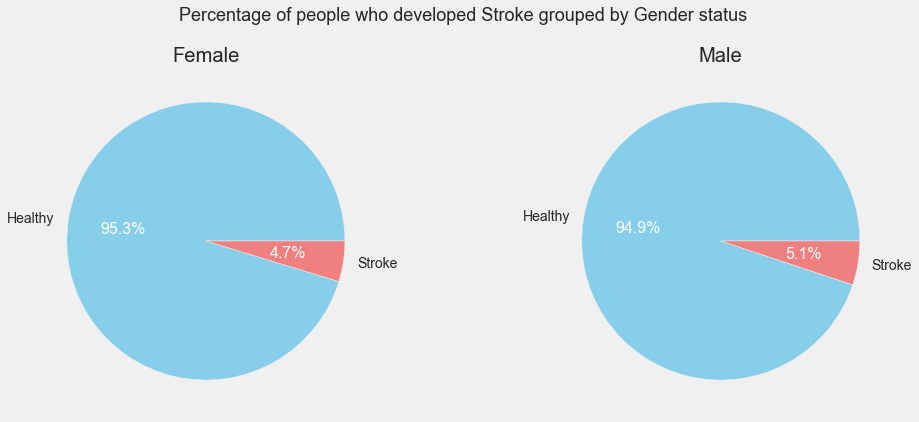

In [258]:
pie_with_target(df, 'gender', 'Gender')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Age :</h3>

**Age of the patient**

In [259]:
col_details('age')

Name : age 
Type : float64
Number of unique Values : 104
Number of null Values : 0

Some Random Data 
 1707    23.0
1708    14.0
1709    35.0
1710    45.0
1711    52.0
Name: age, dtype: float64

Top 5 Values Float64Index([78.0, 57.0, 52.0, 54.0, 51.0], dtype='float64')
Max value : 82.0
Min Value : 0.08


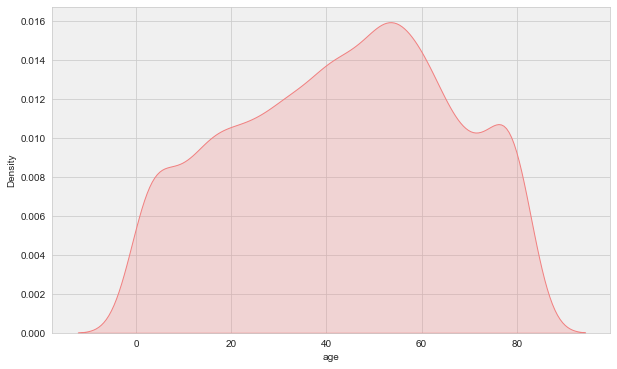

In [260]:
kde_plot('age')

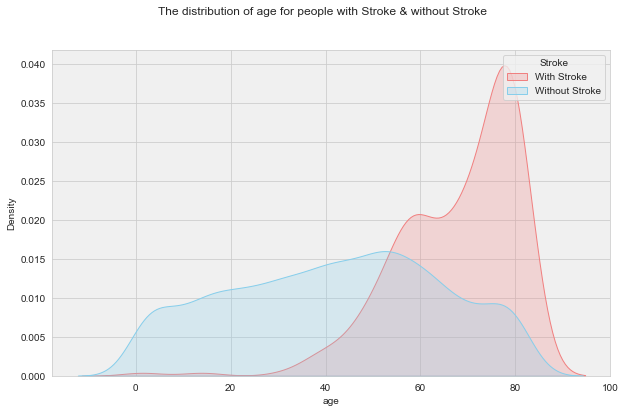

In [261]:
kde_with_target('age')

In [262]:
print("the mean of Age of people with Stroke is ",df[df['stroke'] == 1]['age'].median())

the mean of Age of people with Stroke is  71.0


In [263]:
print("the mean of Age of people without Stroke is ",df[df['stroke'] == 0]['age'].median())

the mean of Age of people without Stroke is  43.0


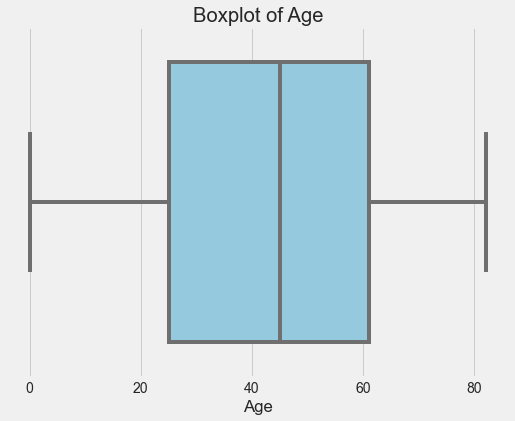

In [264]:
box_plot(df,'age','Age')

In [265]:
IQR_bands("age")

(115.0, -29.0)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Hypertension :</h3>

**Whether or not the patient has hypertension**

In [266]:
col_details('hypertension')

Name : hypertension 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1955    1
1956    0
1957    0
1958    0
1959    0
Name: hypertension, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


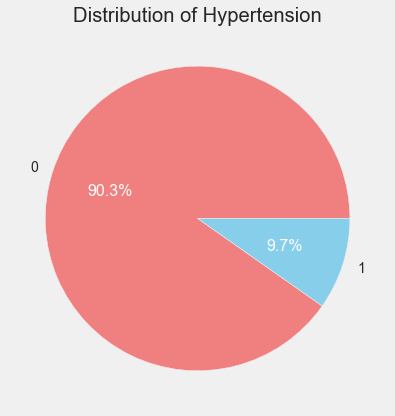

In [267]:
pie_plot(df, 'hypertension', 'Hypertension', colors=['lightcoral','skyblue'])


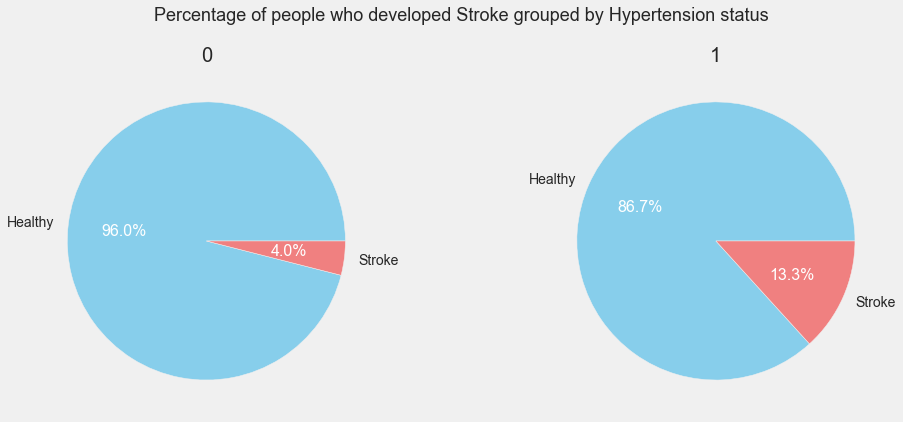

In [268]:
pie_with_target(df, 'hypertension', 'Hypertension')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Heart_Disease :</h3>

**Whether or not the patient has heart disease**

In [269]:
col_details('heart_disease')

Name : heart_disease 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 3637    0
3638    0
3639    0
3640    0
3641    1
Name: heart_disease, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


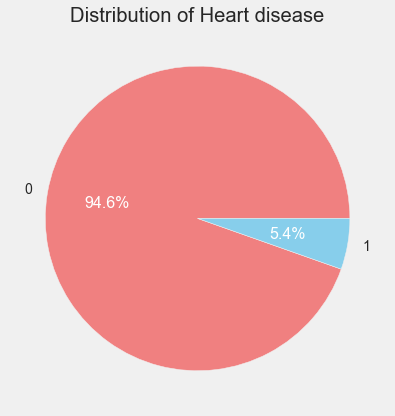

In [270]:
pie_plot(df, 'heart_disease', 'Heart disease', colors=['lightcoral','skyblue'])

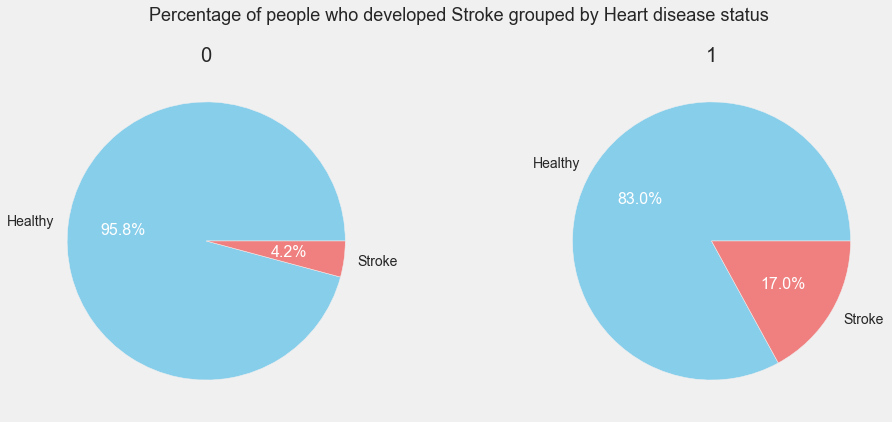

In [271]:
pie_with_target(df, 'heart_disease', 'Heart disease')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Ever_Married :</h3>

**Whether or not the patient has ever been married**

In [272]:
col_details('ever_married')

Name : ever_married 
Type : object
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 1809     No
1810    Yes
1811     No
1812     No
1813    Yes
Name: ever_married, dtype: object

Top 5 Values Index(['Yes', 'No'], dtype='object')


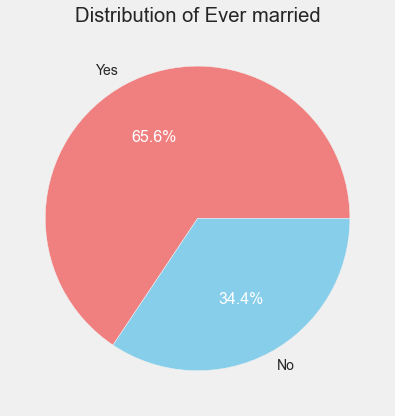

In [273]:
pie_plot(df, 'ever_married', 'Ever married', colors=['lightcoral','skyblue'])

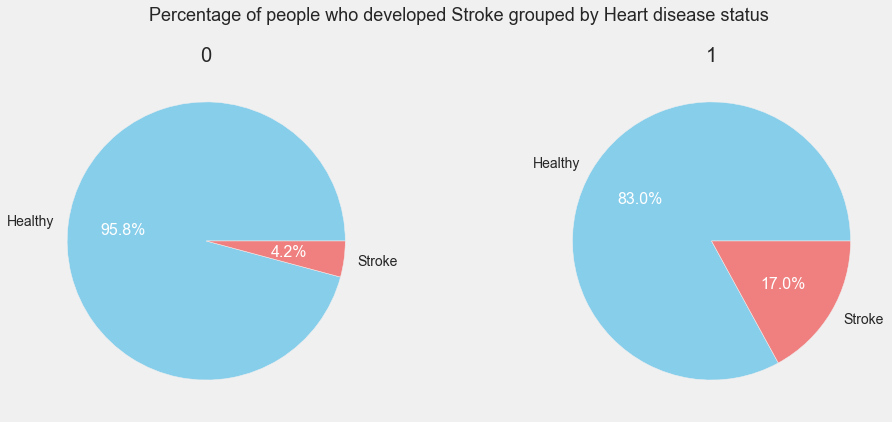

In [274]:
pie_with_target(df, 'heart_disease', 'Heart disease')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Work_Type :</h3>

**Type of occupation**

In [275]:
col_details('work_type')

Name : work_type 
Type : object
Number of unique Values : 5
Number of null Values : 0

Some Random Data 
 2924         Govt_job
2925    Self-employed
2926    Self-employed
2927         children
2928         children
Name: work_type, dtype: object

Top 5 Values Index(['Private', 'Self-employed', 'children', 'Govt_job', 'Never_worked'], dtype='object')


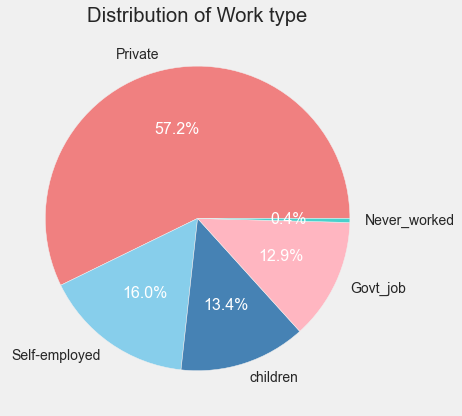

In [276]:
pie_plot(df, 'work_type', 'Work type', colors=['lightcoral','skyblue','steelblue','lightpink','mediumturquoise'])

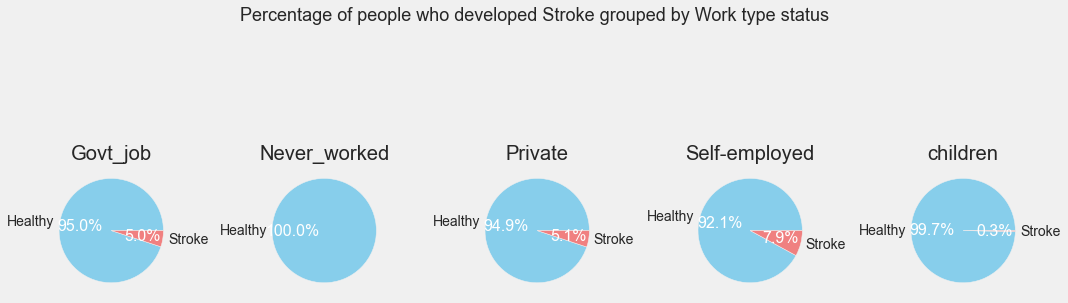

In [277]:
pie_with_target(df,'work_type', 'Work type') 

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Residence_Type :</h3>

**Type of residence**

In [278]:
col_details('Residence_type')

Name : Residence_type 
Type : object
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 3626    Rural
3627    Rural
3628    Urban
3629    Urban
3630    Rural
Name: Residence_type, dtype: object

Top 5 Values Index(['Urban', 'Rural'], dtype='object')


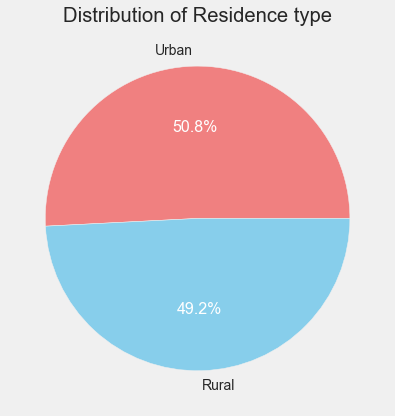

In [279]:
pie_plot(df, 'Residence_type', 'Residence type', colors=['lightcoral','skyblue'])

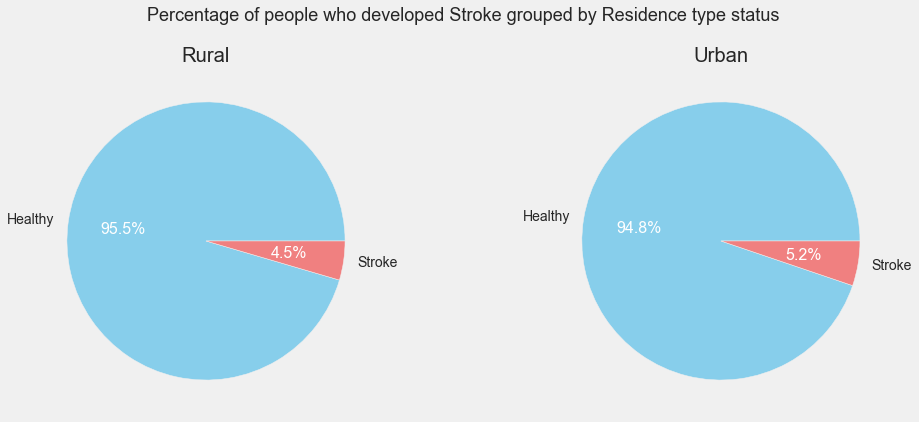

In [280]:
pie_with_target(df, 'Residence_type', 'Residence type')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Avg_Glucose_Level :</h3>

**Average glucose level in blood**

In [281]:
col_details('avg_glucose_level')

Name : avg_glucose_level 
Type : float64
Number of unique Values : 3978
Number of null Values : 0

Some Random Data 
 1627    202.66
1628    216.90
1629    103.78
1630    114.88
1631     75.94
Name: avg_glucose_level, dtype: float64

Top 5 Values Float64Index([93.88, 72.49, 83.16, 91.85, 84.1], dtype='float64')
Max value : 271.74
Min Value : 55.12


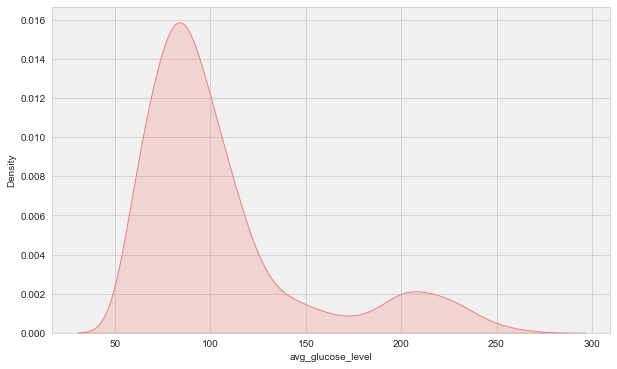

In [282]:
kde_plot('avg_glucose_level')

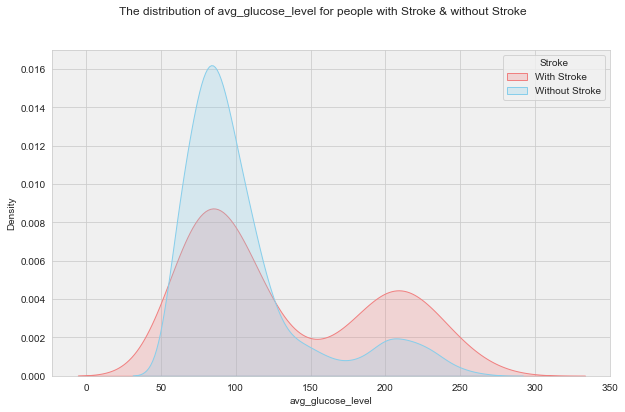

In [283]:
kde_with_target('avg_glucose_level')

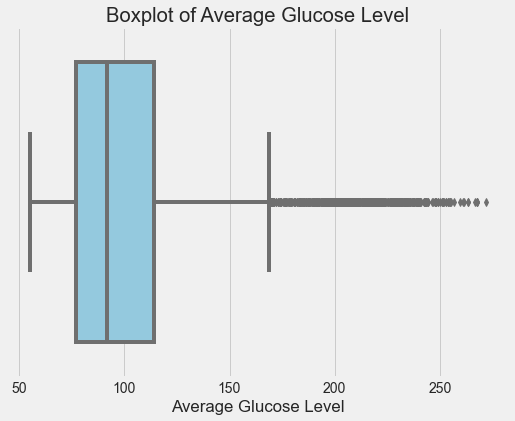

In [284]:
box_plot(df,'avg_glucose_level','Average Glucose Level')

In [285]:
IQR_bands("avg_glucose_level")

(169.365, 21.964999999999982)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">BMI :</h3>

**Body Mass Index**

In [286]:
col_details('bmi')

Name : bmi 
Type : float64
Number of unique Values : 418
Number of null Values : 0

Some Random Data 
 3612    32.9
3613    27.6
3614    26.5
3615    19.2
3616    25.9
Name: bmi, dtype: float64

Top 5 Values Float64Index([28.1, 28.7, 28.4, 27.7, 27.6], dtype='float64')
Max value : 97.6
Min Value : 10.3


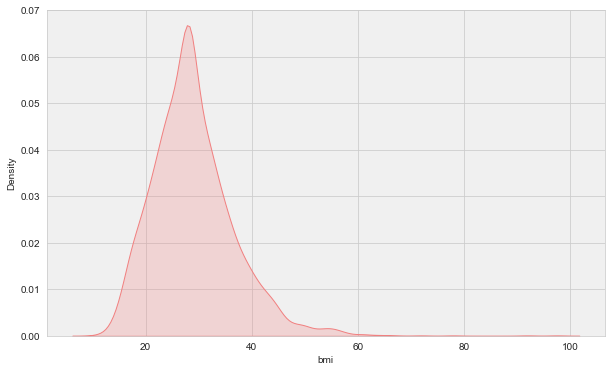

In [287]:
kde_plot('bmi')

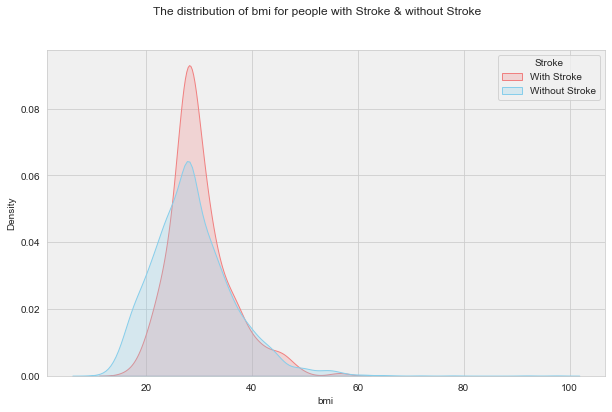

In [288]:
kde_with_target('bmi')

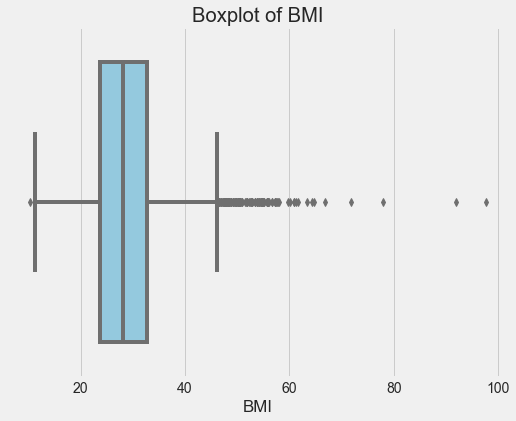

In [289]:
box_plot(df,'bmi','BMI')

In [290]:
IQR_bands("bmi")

(46.29999999999999, 10.300000000000006)

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Smoking_Status :</h3>

**Smoking status**

In [291]:
col_details('smoking_status')

Name : smoking_status 
Type : object
Number of unique Values : 4
Number of null Values : 0

Some Random Data 
 2326       never smoked
2327    formerly smoked
2328       never smoked
2329            Unknown
2330            Unknown
Name: smoking_status, dtype: object

Top 5 Values Index(['never smoked', 'Unknown', 'formerly smoked', 'smokes'], dtype='object')


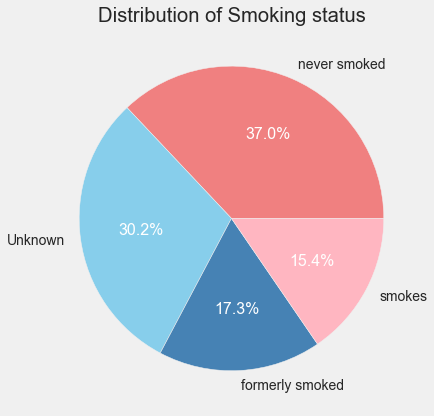

In [292]:
pie_plot(df, 'smoking_status', 'Smoking status', colors=['lightcoral','skyblue','steelblue','lightpink'])

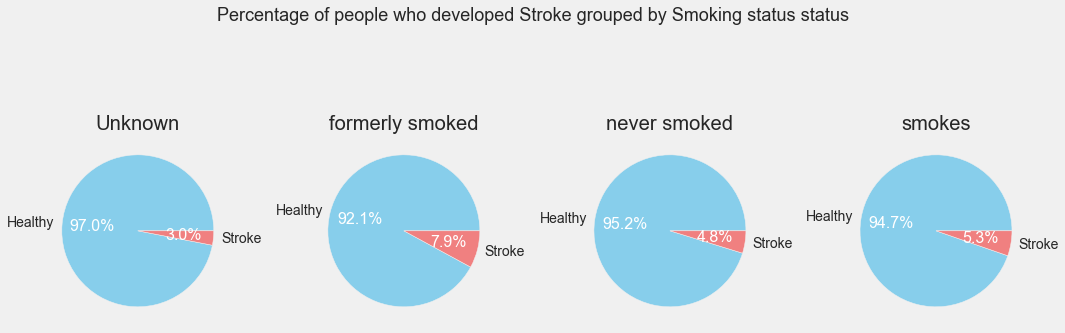

In [293]:
pie_with_target(df, 'smoking_status', 'Smoking status')

# <a id="2.1"></a>
<h3 style="background-color:mistyrose;font-family:newtimeroman;font-size:200%;text-align:center;border-radius: 15px 50px;">Target :</h3>

**Whether the patient had a stroke**

In [294]:
col_details('stroke')

Name : stroke 
Type : int64
Number of unique Values : 2
Number of null Values : 0

Some Random Data 
 2871    0
2872    0
2873    0
2874    0
2875    0
Name: stroke, dtype: int64

Top 5 Values Int64Index([0, 1], dtype='int64')
Max value : 1
Min Value : 0


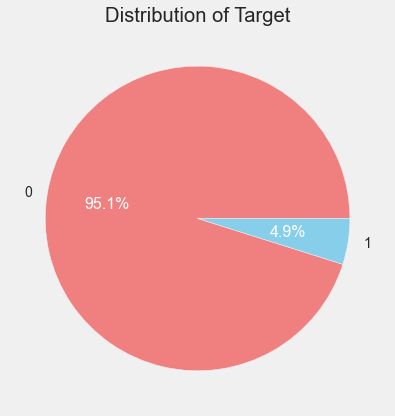

In [295]:
pie_plot(df, 'stroke', 'Target', colors=['lightcoral','skyblue'])

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Data Correlation</h3>

In [296]:
df.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276367,0.263777,0.238323,0.324211,0.245239
hypertension,0.276367,1.000000,0.108292,0.174540,0.158252,0.127891
heart_disease,0.263777,0.108292,1.000000,0.161907,0.036879,0.134905
avg_glucose_level,0.238323,0.174540,0.161907,1.000000,0.167033,0.131991
bmi,0.324211,0.158252,0.036879,0.167033,1.000000,0.036075
stroke,0.245239,0.127891,0.134905,0.131991,0.036075,1.000000


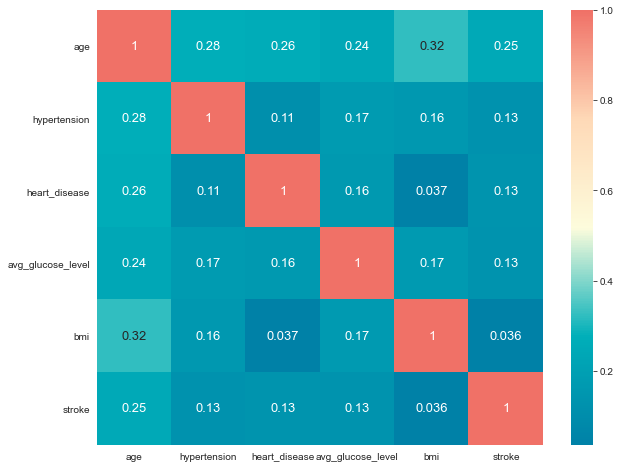

In [297]:
palette = ["#0081A7", "#00AFB9", "#FDFCDC", "#FED9B7", "#F07167"]
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("my_palette", palette)

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, annot_kws={"size": 13}, cmap=cmap)
plt.show()

# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Variance Inflation Factor</h3>

In [298]:
# create a new dataframe for features 
data_features = data[numerical_columns].drop('target',axis=1)
# 
vif_data = pd.DataFrame()
vif_data["feature"] = data_features.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_features.values, i)
                          for i in range(len(data_features.columns))]

vif_data.sort_values("VIF",ascending=False)

In [9]:
!pip install statsmodels

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [67]:
# [item for item in items if item >  }
numerical_columns = [col for col in df.columns if df[col].dtype != "O"]
numerical_columns

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [69]:
# create a new dataframe for features 
df_features = df[numerical_columns].drop('stroke',axis=1)
# 
vif_df = pd.DataFrame()
vif_df["feature"] = df_features.columns
  
# calculating VIF for each feature
vif_df["VIF"] = [variance_inflation_factor(df_features.values, i)
                          for i in range(len(df_features.columns))]

vif_df.sort_values("VIF",ascending=False)

,feature,VIF
4,bmi,8.094340
3,avg_glucose_level,6.010570
0,age,5.897422
1,hypertension,1.196203
2,heart_disease,1.150581


# <a id="2.1"></a>
<h3 style="background-color:skyblue;font-family:newtimeroman;font-size:250%;text-align:center;border-radius: 15px 50px;">Updating Data</h3>

In [71]:
df.to_csv("Cleaned_stroke_data.csv")